<a href="https://colab.research.google.com/github/gbroy1999/deep-learning/blob/master/mnist_digit_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


9


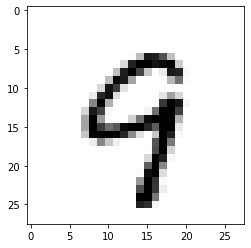

In [1]:

import matplotlib.pyplot as plt
image_index = 5869
print(y_test[image_index]) 
plt.imshow(x_test[image_index], cmap='Greys')

In [0]:

x_train.shape


(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)


In [0]:
x_train.shape 

(60000, 28, 28, 1)

In [0]:
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [0]:
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

In [0]:
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [0]:

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/10





60000/60000 [==============================] - 22s 359us/step - loss: 0.1539 - acc: 0.9525
Epoch 2/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0491 - acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 8s 126us/step - loss: 0.0357 - acc: 0.9886
Epoch 4/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0271 - acc: 0.9916
Epoch 5/10
60000/60000 [==============================] - 8s 127us/step - loss: 0.0213 - acc: 0.9930
Epoch 6/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.0179 - acc: 0.9945
Epoch 7/10
60000/60000 [==============================] - 8s 128us/step - loss: 0.0160 - acc: 0.9950
Epoch 8/10
60000/60000 [==============================] - 8s 125us/step - loss: 0.0124 - acc: 0.9959
Epoch 9/10
60000/60000 [==============================] - 7s 124us/step - loss: 0.0118 

In [0]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 1s 54us/step


[0.03955567476884098, 0.9908]

6


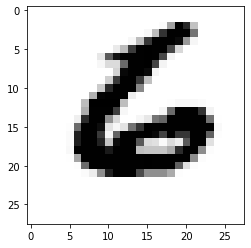

In [0]:
image_index = 9999
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28,28, 1))
print(pred.argmax())
#print(pred)

In [0]:
import tensorflow as tf
import keras
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

#splitting into validaton

# x_train,y_train,x_validation,y_validation = train_test_split(x_train,x_test,test_size=0.2)

num_train,num_validation =int( 0.8 * len(x_train)),int( 0.2 * len(x_train))


num_train,num_validation

In [0]:
x_train = x_train[:num_train,1:]
x_validation = x_train[num_train:,0]

In [0]:
x_validation.shape